# Part 2: Classification

# 1- Introduction
L’une des maladies les plus diagnostiqué chez l'etre humain est l'autisme. L’autisme est un trouble neuro-développemental qui se caractérise par des lacunes d’intégration sociale et de communication. L'autisme se manifeste dès la petite enfance. Des anomalies du comportement et du développement intellectuel sont généralement associées à l’autisme.<br>
Afin de prévenir les risques de cette maladie et mieux se protéger, on doit comprendre et apprendre comment les détecter d'une manière efficace et sécurisé. Cette recherche vise à identifier les facteurs de risque de maladie de l'autisme les plus pertinents ainsi qu’à prédire le risque global à l’aide des algorithmes de Classification qui ont pour but de classifier et prédire si un groupe de patients présente un risque de développer une future maladie ou pas.


#  2- Importation des données


In [1]:
### Imports des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt, log, exp

# chargement des données
autism_DF = pd.read_csv('Autism-Adult.data', sep = ',', header = None)



# Renommage des colonnes 
autism_DF.columns = ['A1', 'A2', 'A3','A4','A5',
                    'A6', 'A7', 'A8','A9', 'A10',
                    'age','gender','ethnicity','jundice','autism','country','used_app_before',
                     'result','age_desc','relation',
                    'Class']

#affichage de quelques tuples
autism_DF.head()



,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,gender,ethnicity,jundice,autism,country,used_app_before,result,age_desc,relation,Class
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,'18 and more',?,NO


In [2]:
#Afficher la forme du dataset(nbTuples,nbColonnes)
autism_DF.shape

(704, 21)

<h2>Attribute Information:</h2>
-- 1. A1: la reponse de la question 1 par un '0 ou 1' basé sur la méthode de dépistage utilisé  <br>
-- 2. A2: la reponse de la question 2 par un '0 ou 1' basé sur la méthode de dépistage utilisé<br>
-- 3. A3: la reponse de la question 3 par un '0 ou 1' basé sur la méthode de dépistage utilisé<br>
-- 4. A4: la reponse de la question 4 par un '0 ou 1' basé sur la méthode de dépistage utilisé<br>
-- 5. A5: la reponse de la question 5 par un '0 ou 1' basé sur la méthode de dépistage utilisé<br>
-- 6. A6: la reponse de la question 6 par un '0 ou 1' basé sur la méthode de dépistage utilisé<br>
-- 7. A7: la reponse de la question 7 par un '0 ou 1' basé sur la méthode de dépistage utilisé<br>
-- 8. A8: la reponse de la question 8 par un '0 ou 1' basé sur la méthode de dépistage utilisé<br>
-- 9. A9: la reponse de la question 9 par un '0 ou 1' basé sur la méthode de dépistage utilisé<br>
-- 10. A10: la reponse de la question 10 par un '0 ou 1' basé sur la méthode de dépistage utilisé<br>
-- 11. age: age de la personne dépisté<br>                        
-- 12. gender: genre de la personne soit f(femme) ou h(homme)<br>                        
-- 13. ethnicity: l'ethnie de la personne dépisté<br>                        
-- 14. jundice: Si le cas est né avec la jaunisse<br>                        
-- 15. autism: Si le cas a un trouble de l'autisme<br>                        
-- 16. country: pays de résidence du cas<br>                        
-- 17. used_app_before: est ce que le cas a déja utilisé une application de dépistage<br>                        
-- 18. result: résultat du dépistage<br>                        
-- 19. age_desc: description du l'age<br>                        
-- 20. relation: personne complétant le test<br>                        
-- 21. Class: Personne atteinte ou pas de l'autisme<br>                        


#####  Transformation de '?' vers NaN et detection des valeurs manquantes
Avant de se lancer au data pre-processing, on a remarqué que le dataset avait des valeurs manquantes de forme '?', de là on va  remplacer les valeurs de ‘?’ par NaN(null).


In [3]:
#Remplacement des '?' par des NaN
autism_DF = autism_DF.replace('?',np.nan)

#Affichage des informations des colonnes
autism_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1               704 non-null    int64 
 1   A2               704 non-null    int64 
 2   A3               704 non-null    int64 
 3   A4               704 non-null    int64 
 4   A5               704 non-null    int64 
 5   A6               704 non-null    int64 
 6   A7               704 non-null    int64 
 7   A8               704 non-null    int64 
 8   A9               704 non-null    int64 
 9   A10              704 non-null    int64 
 10  age              702 non-null    object
 11  gender           704 non-null    object
 12  ethnicity        609 non-null    object
 13  jundice          704 non-null    object
 14  autism           704 non-null    object
 15  country          704 non-null    object
 16  used_app_before  704 non-null    object
 17  result           704 non-null    in

Colonnes avec les valeurs manquantes:
['age', 'ethnicity', 'relation']


<AxesSubplot:title={'center':'Plot bar de nombres de valeurs manquantes pour chaque attribut'}>

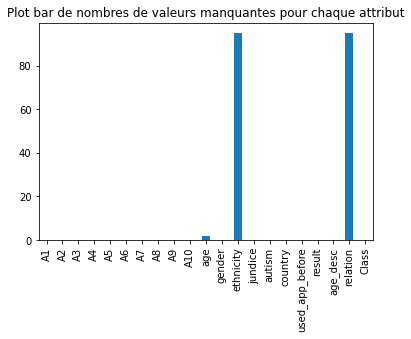

In [4]:
#Sur ces lignes de codes, on va compter le nombre de valeurs manquantes pour chaque colonne du dataset
na_count = autism_DF.isnull().sum()
na_columns = list(na_count[na_count>0].index.values)

#Affichage des colonnes avec des missing values
print("Colonnes avec les valeurs manquantes:")
print(na_columns)

#Affichage des colonnes avec le nombre de missing values en plot bar
na_count.plot(kind = "bar", title="Plot bar de nombres de valeurs manquantes pour chaque attribut")

D'apres les deux derniers bouts de code, on aperçoit qu'on a des données manquantes sur la colonne "age" avec 2 valeurs vides manquantes non renseignés, la colonne "ethnicity" avec 95 valeurs vides manquantes non renseignés et la colonne "relation" avec 95 valeurs vides manquantes non renseignés qu'on va par la suite traiter dans une prochaine partie.

#####  Modification des types des colonnes du dataset
C'est une étape qui precede l'etape de data understanding, pour celà on repere les colonnes qui devraient etre de base en type int ou float et on les trouves object, puis on change le type au bon type desiré.

In [5]:
#Affichage les informations des datasets pour voir le type de chaque colonne
autism_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1               704 non-null    int64 
 1   A2               704 non-null    int64 
 2   A3               704 non-null    int64 
 3   A4               704 non-null    int64 
 4   A5               704 non-null    int64 
 5   A6               704 non-null    int64 
 6   A7               704 non-null    int64 
 7   A8               704 non-null    int64 
 8   A9               704 non-null    int64 
 9   A10              704 non-null    int64 
 10  age              702 non-null    object
 11  gender           704 non-null    object
 12  ethnicity        609 non-null    object
 13  jundice          704 non-null    object
 14  autism           704 non-null    object
 15  country          704 non-null    object
 16  used_app_before  704 non-null    object
 17  result           704 non-null    in

a partir de ces informations, on peut voir que la colonne 'age' est de type object alors qu'elle devait etre de type int ou float car on parle de l'age d'une personne.

In [6]:
#typage des données
autism_DF.age = autism_DF.age.astype(float)
autism_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1               704 non-null    int64  
 1   A2               704 non-null    int64  
 2   A3               704 non-null    int64  
 3   A4               704 non-null    int64  
 4   A5               704 non-null    int64  
 5   A6               704 non-null    int64  
 6   A7               704 non-null    int64  
 7   A8               704 non-null    int64  
 8   A9               704 non-null    int64  
 9   A10              704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        609 non-null    object 
 13  jundice          704 non-null    object 
 14  autism           704 non-null    object 
 15  country          704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

#####  Exploration des valeurs uniques possibles du dataset
çà permet de voir les differentes valeurs uniques du dataset pour chaque colonne, et si jamais y'a des valeurs non uniques, on peu les fusionner.

In [7]:
#Affichage des valeurs uniques de chaque Colonne du dataset
for col in autism_DF:
    print("Column", col,"unique values: ",autism_DF[col].unique())

Column A1 unique values:  [1 0]
Column A2 unique values:  [1 0]
Column A3 unique values:  [1 0]
Column A4 unique values:  [1 0]
Column A5 unique values:  [0 1]
Column A6 unique values:  [0 1]
Column A7 unique values:  [1 0]
Column A8 unique values:  [1 0]
Column A9 unique values:  [0 1]
Column A10 unique values:  [0 1]
Column age unique values:  [ 26.  24.  27.  35.  40.  36.  17.  64.  29.  33.  18.  31.  30.  34.
  38.  42.  43.  48.  37.  55.  50.  53.  20.  28.  21. 383.  47.  32.
  44.  nan  19.  58.  45.  22.  39.  25.  23.  54.  60.  41.  46.  56.
  61.  59.  52.  49.  51.]
Column gender unique values:  ['f' 'm']
Column ethnicity unique values:  ['White-European' 'Latino' nan 'Others' 'Black' 'Asian'
 "'Middle Eastern '" 'Pasifika' "'South Asian'" 'Hispanic' 'Turkish'
 'others']
Column jundice unique values:  ['no' 'yes']
Column autism unique values:  ['no' 'yes']
Column country unique values:  ["'United States'" 'Brazil' 'Spain' 'Egypt' "'New Zealand'" 'Bahamas'
 'Burundi' 'Aus

A partir de cette vérification sur l'unicité des valeurs, on apperçoit que sur la colonne "ethnicity" y'a une redondance d'une meme valeur ou on voit 'Others' et 'others', qu'on doit traité dans une prochaine partie. 

#  3- Compréhension des données
<br>
Etude statistique avec des nombres qui vont resumé les proprietés des données qu'on étudie.<br>
Avant d’effectuer l’étape de data pre-processing, on doit d’abord comprendre les données, cela peut nous aider à mieux appliquer nos connaissances en data pre-processing, car on peut comprendre nos données et on peu éventuellement trouver des anomalies dans nos données qu’on va traiter par la suite dans la partie de data pre-processing.


## 3-1 Mesures de tendance centrale
Dans cette étape, on va voir les différentes mesures comme : mean, mean trimmed, median, min, max, mode et distribution de chaque attribut, et on va voir la distribution de la maladie sur label Class.

###### Mean (Weighted arithmetic mean):

A1         0.721591
A2         0.453125
A3         0.457386
A4         0.495739
A5         0.498580
A6         0.284091
A7         0.417614
A8         0.649148
A9         0.323864
A10        0.573864
age       29.698006
result     4.875000
dtype: float64

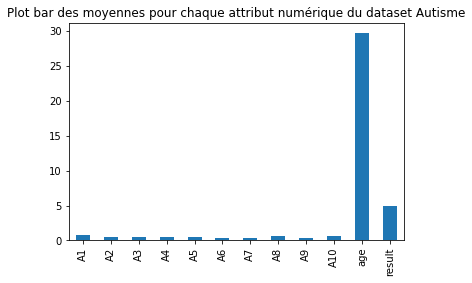

In [8]:
#Mean Weighted arithmetic mean:
#Transformation et affichage des moyennes du chaque colonne dans un plot bar
means = autism_DF
means.mean(skipna=True).plot(kind='bar',title="Plot bar des moyennes pour chaque attribut numérique du dataset Autisme")
means.mean()

##### Trimmed Mean (Without Min Max):


A1         0.722222
A2         0.452991
A3         0.457265
A4         0.495726
A5         0.498575
A6         0.283476
A7         0.417379
A8         0.649573
A9         0.323362
A10        0.574074
age       29.211429
result     4.874644
dtype: float64

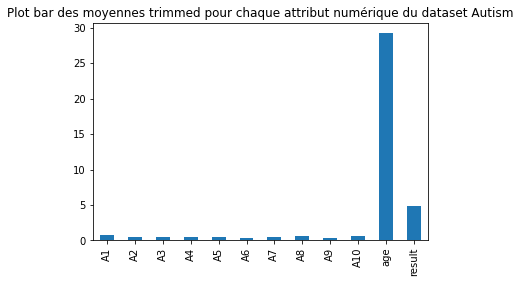

In [9]:
# Trimmed MEAN:
# On recupere les colonnes qui ont des valeurs Numeric et non categorique
trimmed = means.drop(['gender','ethnicity','jundice','autism','relation','country','used_app_before','age_desc','Class'], axis=1)

#Calcul des Trimmed Means
trimmed=(trimmed.sum() - trimmed.min() - trimmed.max()) / (trimmed.notnull().sum() - 2)

#Affichage des moyennes coupées pour chaque attribut du dataset dans un plot bar
trimmed.plot(kind='bar',title="Plot bar des moyennes trimmed pour chaque attribut numérique du dataset Autism")
trimmed

En appliquant les deux moyennes, on voit pas vraiment de grande difference entre les résultats des deux moyennes de Mean Weight et de Mean Trimmed sur les features de Dataset Autisme, ces moyennes pour les deux façons de calculs sont presque identiques. 

##### Median:

A1         1.0
A2         0.0
A3         0.0
A4         0.0
A5         0.0
A6         0.0
A7         0.0
A8         1.0
A9         0.0
A10        1.0
age       27.0
result     4.0
dtype: float64

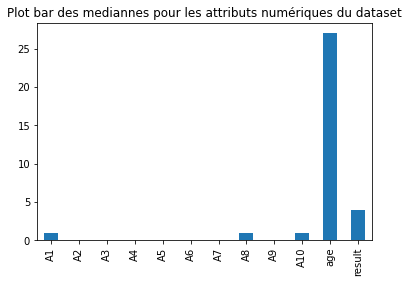

In [10]:
#Median
#Affichage des mediannes pour toutes les colonnes du dataset dans plot bar
means.median().plot(kind='bar',title="Plot bar des mediannes pour les attributs numériques du dataset")

#affichage des mediannes des colonnes à part
means.median()


D'apres ces résultats en haut, on peut voir que la plupart des mediannes pour les features sont à 0.

##### Mode:

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,gender,ethnicity,jundice,autism,country,used_app_before,result,age_desc,relation,Class
0,1,0,0,0,0,0,0,1,0,1,...,m,White-European,no,no,'United States',no,4,'18 and more',Self,NO


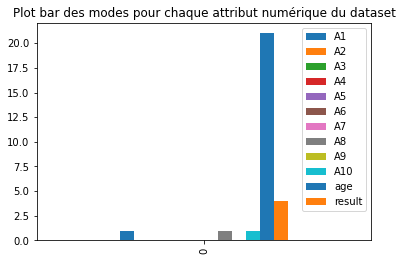

In [11]:
#Mode: Le mode d'un ensemble de valeurs est la valeur qui apparaît le plus souvent. Il peut s'agir de plusieurs valeurs.
#Affichage des modes pour chaque colonne du dataset en Plot Bar
means.mode(dropna=True).plot(kind='bar',title="Plot bar des modes pour chaque attribut numérique du dataset")

#Affichage des modes pour chaque colonne du dataset dans un tableau
means.mode(dropna=True)


###### Max:

In [12]:
#MAX 
#affichage des maxs de chaque colonnes du dataset
print("Max de chaque attribut:")
means.max()

Max de chaque attribut:


A1                             1
A2                             1
A3                             1
A4                             1
A5                             1
A6                             1
A7                             1
A8                             1
A9                             1
A10                            1
age                          383
gender                         m
jundice                      yes
autism                       yes
country                  Uruguay
used_app_before              yes
result                        10
age_desc           '18 and more'
Class                        YES
dtype: object

On remarque sur les max des valeurs qu'on a que y'a une valeur d'age à 383 qui n'est pas éxistant, qu'on peut ajouter aux outliers, qu'on va devoir traité dans une prochaine partie.

###### Min:

In [13]:
#Min
#affichage des mins de chaque colonnes du dataset
print("Min de chaque attribut:")
means.min()

Min de chaque attribut:


A1                             0
A2                             0
A3                             0
A4                             0
A5                             0
A6                             0
A7                             0
A8                             0
A9                             0
A10                            0
age                           17
gender                         f
jundice                       no
autism                        no
country             'Costa Rica'
used_app_before               no
result                         0
age_desc           '18 and more'
Class                         NO
dtype: object

On peut voir ici que les plus jeunes personnes de ce dataset ont 17 ans.

##### Distribution Gaussienne


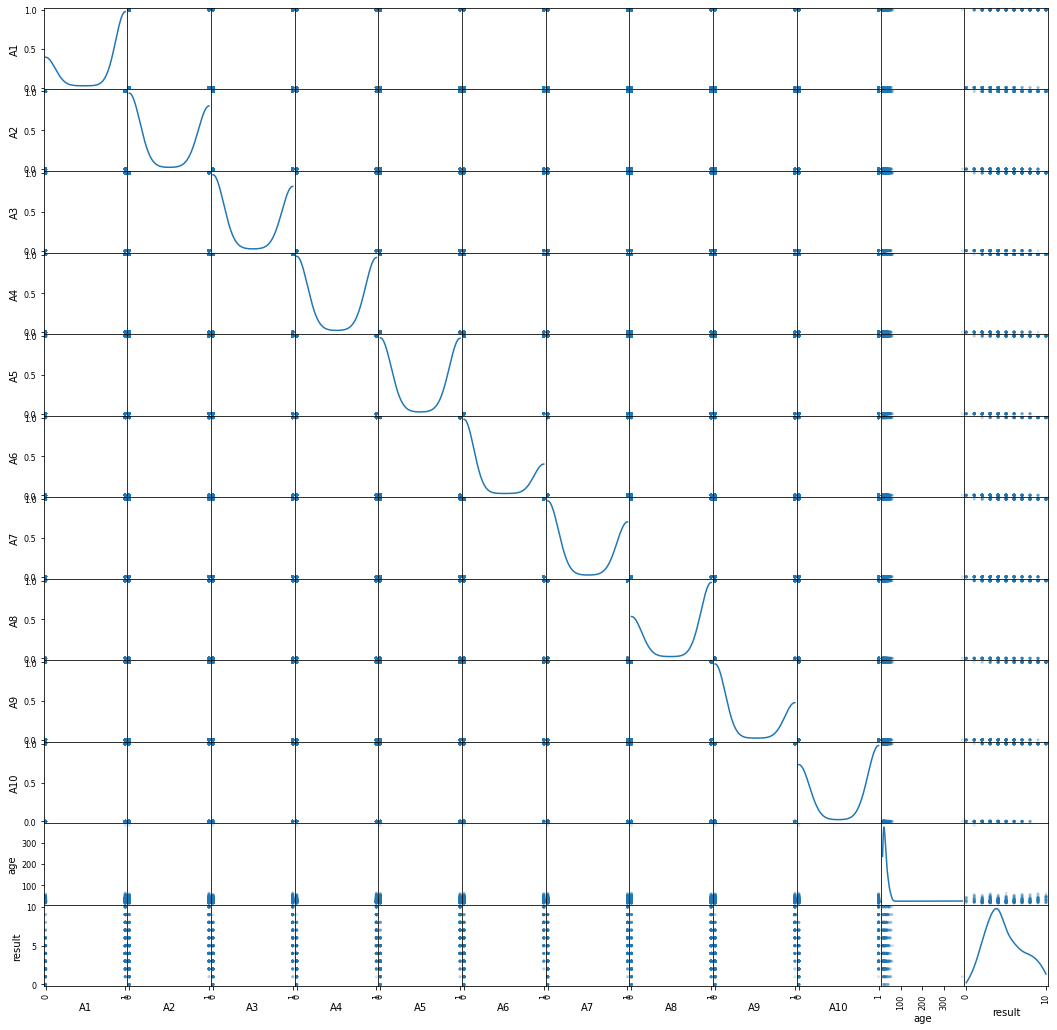

In [14]:
#Distribution Gaussienne
from pandas.plotting import scatter_matrix

#Affichage de la matice scatter pour afficher les differents graphes de distrubution des donnees de chaque colonne
scatter_matrix(autism_DF, alpha=0.2, figsize=(18, 18), diagonal='kde')
#plt.savefig("Distribution des attributs.png") 
plt.show()


A partir de cette matrix scatter plot, on aperçoit que les attributs suivants ne sont pas en distrubution gaussienne, par la suite il faut les transformer, on verra çà dans une prochaine étape dans la data transformation.

##### Distribution of Autism disease


Nombre de gens atteintes de autism Disease: 189
Nombre de gens non atteintes de autism Disease: 515


<AxesSubplot:title={'center':'Plot bar de nombres de Malade et non Malade de autism disease'}>

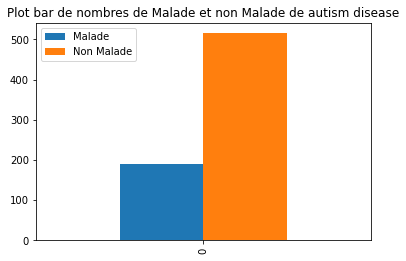

In [15]:
# Distribution of Autism disease
# Valeur de Class NO = non malade sinon YES =  malade
# Calcule le nombre de malades et non malades du dataset, et affichage des gens malades et non malades
malade = (autism_DF['Class'] == 'YES')
print("Nombre de gens atteintes de autism Disease:",malade.sum())
nonMalade = (autism_DF['Class'] == 'NO')
print("Nombre de gens non atteintes de autism Disease:",nonMalade.sum())

# Création d'uun dataframe pour les affichées par la suite
d = {'Malade': [malade.sum()], 'Non Malade': [nonMalade.sum()]}
df = pd.DataFrame(data=d)

#Affichage du nombres de malade et non malades du dataset initial à partir du dataframe créer dans cette section
df.plot(kind = "bar", title="Plot bar de nombres de Malade et non Malade de autism disease")


On apperçoit à partir de ce petit test et de ce plot, que les classes sont imbalanced; ça implique que le dataset est imbalanced, et qu'on a besoin de traiter ce type de probleme qu'on vas voir dans les prochaines étapes.

## 3-2 Mesures de la dispersion des données
Dans cette étape, on va voir les différentes mesures comme : quartiles, Interquartiles, Variance et standard déviation.

###### Quartiles et  detection de outliers


<AxesSubplot:>

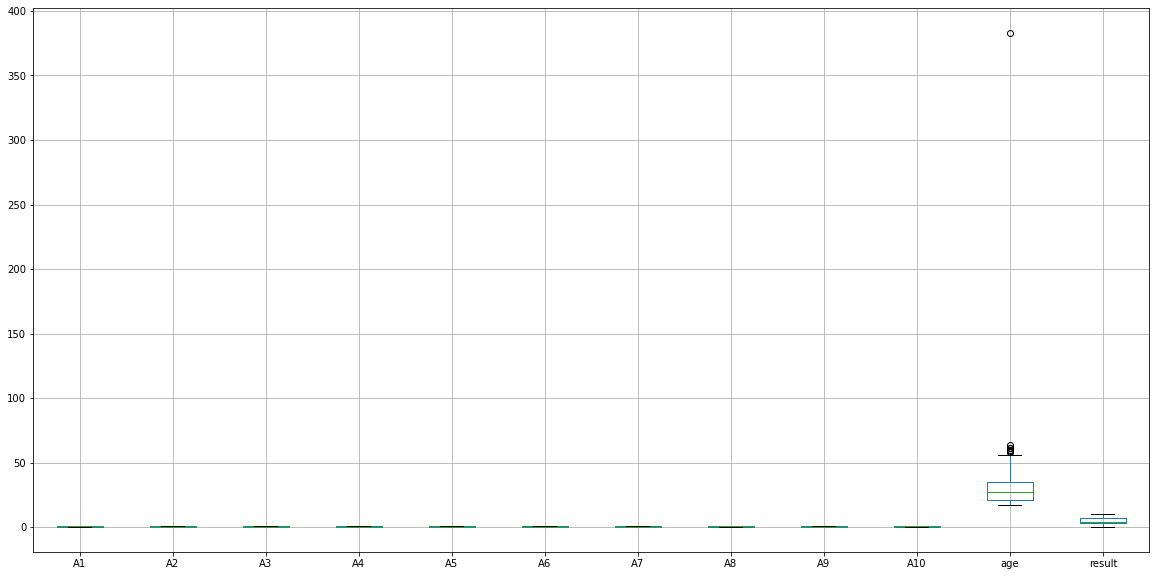

In [16]:
#Quartiles et outliers
#Affichage en boxplot des de la distribution des données du chaque colonne à valeurs numéric
autism_DF.boxplot(figsize=(20,10))


A partir de ce plot on apperçoit qu'il y'a vraiment l'outlier de l'age celui de 383 ans qui ce confirme comme outlier dans ce boxplot, on va traité çà dans un prochaine partie. 

##### Quantiles


In [17]:
#Quantiles
#Q1 et Q2 et Q3
# affichage des quantiles du chaque colonne numeric du dataset
print("Les quantiles du dataset")
x = means.quantile([0.25,0.5,0.75])
x

Les quantiles du dataset


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,age,result
0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,3.0
0.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,27.0,4.0
0.75,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,35.0,7.0


<AxesSubplot:title={'center':'Graphe affichant les differents quantiles des attributs'}>

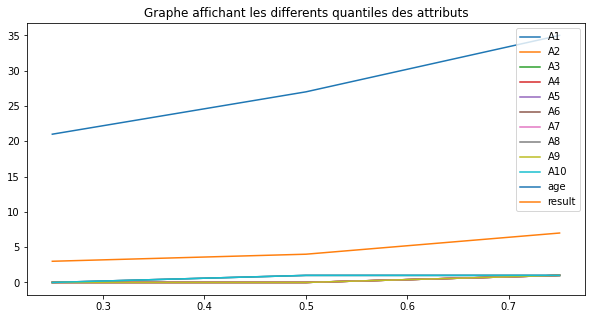

In [18]:
#Affichage d'un graphe des differents quantiles du dataset pour les attributs numeric
x.plot(figsize=(10,5),title="Graphe affichant les differents quantiles des attributs")

###### Variance and standard deviation 


In [19]:
#Variance and standard deviation 
#Variance
print("La variance des attributs du data set")
print(means.var())
print()
#Standard deviation
print("La deviation standard des attributs du data set")
print(means.std())


La variance des attributs du data set
A1          0.201183
A2          0.248155
A3          0.248537
A4          0.250337
A5          0.250354
A6          0.203673
A7          0.243558
A8          0.228079
A9          0.219287
A10         0.244892
age       272.496401
result      6.257468
dtype: float64

La deviation standard des attributs du data set
A1         0.448535
A2         0.498152
A3         0.498535
A4         0.500337
A5         0.500353
A6         0.451301
A7         0.493516
A8         0.477576
A9         0.468281
A10        0.494866
age       16.507465
result     2.501493
dtype: float64


#  4-  Pre-processing des données
## 4-1 Data cleaning
 

Comme c'était le cas à partir de la partie de data understanding (section 3), on a été confronté à beaucoup de problemes, notamment le probleme de des valeurs manquantes sur les colonnes "age", "ethnicity" et "relation". De plus, on a le probleme de outlier de l'age. Aussi, on a pu remarqué que certains valeurs avait un doublons sur la colonne "ethnicity" alors que de base çà ne devait pas se produire.

#### Missing values
Pour cette partie, on doit remplir les valeurs manquantes en génerale. Mais, dans notre cas on a deux colonnes de types catégorielles "ethnicity" et "relation", aussi une colonne de type float age.<br>
A partir de là soit, on remplit les valeurs manquantes avec les valeurs les plus frequentes pour les colonnes catégorielles et avec la moyenne la colonne age, ou bien de supprimer 95 tuples du dataset qui est une deuxieme solution.<br>
Sur cette résolution, on vas faire la premiere méthode.

In [20]:
#Missing values problem resolution 
missing_DF = autism_DF

#Affichage de nombres de valeurs nulles pour chaque colonne du dataset 
print('Nombre de valeurs manquantes pour chaque attribut de dataset:')
for colonne in missing_DF.columns:
    print('\t%s: %d' % (colonne,missing_DF[colonne].isna().sum()))

Nombre de valeurs manquantes pour chaque attribut de dataset:
	A1: 0
	A2: 0
	A3: 0
	A4: 0
	A5: 0
	A6: 0
	A7: 0
	A8: 0
	A9: 0
	A10: 0
	age: 2
	gender: 0
	ethnicity: 95
	jundice: 0
	autism: 0
	country: 0
	used_app_before: 0
	result: 0
	age_desc: 0
	relation: 95
	Class: 0


In [21]:
#Résolution du probleme de valeurs manquantes

from sklearn.base import TransformerMixin

#creation d'une classe s'occcupant de faire une imputation aux celules de chaque colonne manquantes.
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.
        Colonnes de dtype object sont imputées par la valeur la plus fréquente de la colonne en question.
        Colonnes d'autres types seront imputed avec la moyenne de chaque colonne.
        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

#Appel des deux fonctions  d'imputation de la classe crée
xt = DataFrameImputer().fit_transform(missing_DF)

#affichage des valeurs du dataset avant et apres l'opération de data imputation
print('Avant le traitement des données manquantes(before imputation)')
print(missing_DF)
print('Aprés le traitement des données manquantes(after imputation)')
print(xt)

Avant le traitement des données manquantes(before imputation)
     A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  ...  gender       ethnicity  \
0     1   1   1   1   0   0   1   1   0    0  ...       f  White-European   
1     1   1   0   1   0   0   0   1   0    1  ...       m          Latino   
2     1   1   0   1   1   0   1   1   1    1  ...       m          Latino   
3     1   1   0   1   0   0   1   1   0    1  ...       f  White-European   
4     1   0   0   0   0   0   0   1   0    0  ...       f             NaN   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...     ...             ...   
699   0   1   0   1   1   0   1   1   1    1  ...       f  White-European   
700   1   0   0   0   0   0   0   1   0    1  ...       m        Hispanic   
701   1   0   1   1   1   0   1   1   0    1  ...       f             NaN   
702   1   0   0   1   1   0   1   0   1    1  ...       m   'South Asian'   
703   1   0   1   1   1   0   1   1   1    1  ...       f  White-European   

    jundice a

In [22]:
autism_DF = xt

#On affiche le nombres de valeurs manquantes pour chaque colonne de dataset apres la data imputaion
print('Nombre de valeurs manquantes pour chaque attribut de dataset:')
for colonne in missing_DF.columns:
    print('%s: %d' % (colonne,autism_DF[colonne].isna().sum()))

Nombre de valeurs manquantes pour chaque attribut de dataset:
A1: 0
A2: 0
A3: 0
A4: 0
A5: 0
A6: 0
A7: 0
A8: 0
A9: 0
A10: 0
age: 0
gender: 0
ethnicity: 0
jundice: 0
autism: 0
country: 0
used_app_before: 0
result: 0
age_desc: 0
relation: 0
Class: 0


#### Outliers 
A partir des BoxPlot et des max qu'on a eu sur la colonne age, on remarque y'a une seule valeur qui réagit comme outlier qui est 383. Pour résoudre çà on va présumé que la personne à mal tapé ses cordonnées au lieu de mettre 38 ans, elle a mis 383 ans.

Détailles statistiques de la colonne age


count    704.000000
mean      29.207949
std        9.696499
min       17.000000
25%       21.000000
50%       27.000000
75%       35.000000
max       64.000000
Name: age, dtype: float64

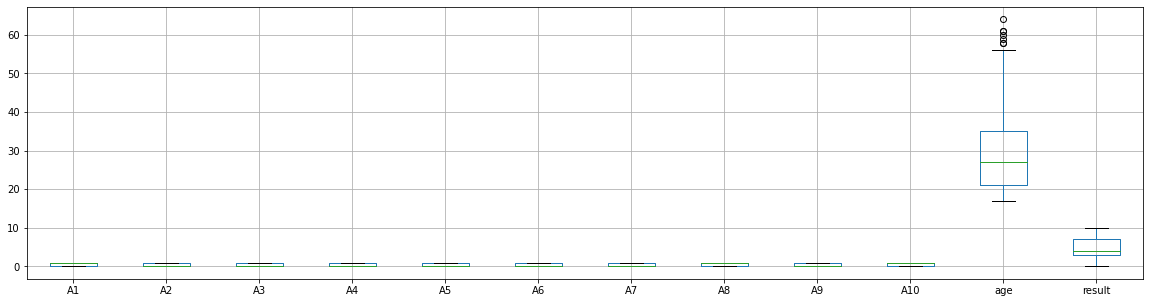

In [23]:
#affectation de la valeur 38 à 383 pour résoudre le probeleme de l'outlier
autism_DF.loc[autism_DF.age == 383, 'age'] = 38

#affichage d'un boxplot des distribution des colonnes numeric apres avoir éffacé le outlier
autism_DF.boxplot(figsize=(20,5))

print("Détailles statistiques de la colonne age")
autism_DF.age.describe()

A partir de ces nouveaux résultats on vois que le nouveau age maximal est de 64 ans qui est plutot plus logique que ce qu'on a eu au départ.

#### Doublons 
A partir de test de l'unicity des valeurs qu'on a fait sur les differentes colonnes, on se trouve avec une colonne qui a un doublon. 

In [24]:
#Résolution de problems de doublons en remplaçant les valeurs qui sont similaires de la meme valeur
autism_DF = autism_DF.replace('others','Others')
print("Column ethnicity unique values: ",autism_DF["ethnicity"].unique())

#variable qui sera utilisé pour faire une analyse sur les données apres avoir fait le cleaning des données.(section4)
vis_data = autism_DF

Column ethnicity unique values:  ['White-European' 'Latino' 'Others' 'Black' 'Asian' "'Middle Eastern '"
 'Pasifika' "'South Asian'" 'Hispanic' 'Turkish']


D'ici on peut voir qu'il y'a une seule valeur de 'Others' dans cette colonne qui résout le probleme rencontré.

## 4-2 Data Integration
Etant donné qu'on travaille sur un seul dataset, y'a pas besoin de faire cette étape

## 4-3 Data Transformation
Comme c'était le cas à partir de la partie de data understanding (section 3), on a été confronté à beaucoup de problemes, notamment sur la non distribution des données en loi gaussienne, aussi le probleme de imbalanced data car les labels classification ne sont pas equally representé.


#### Imbalanced data
Pour résoudre ce probleme, on va faire appel aux méthodes de resampling data pour faire de data oversampling.

Valeurs des classes 1(Yes) et 0(No) apres l'oversampling 
1    515
0    515
Name: Class, dtype: int64
Bar plot du dataset balanced(label=Class)


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

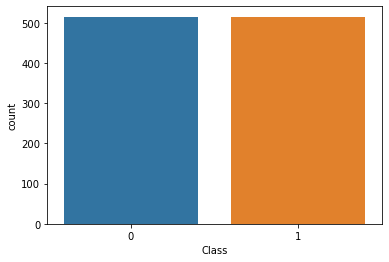

In [25]:
#Imbalanced Data
#Pour ce probleme on vas utiliser Oversampling:qui consiste à compléter les données de formation avec plusieurs
# copies de certaines des classes minoritaires. 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#Encodage de label "Class" en 0 et 1 au lieu d'un YES et NO
autism_DF['Class'] = le.fit_transform(autism_DF['Class'])


from sklearn.utils import resample
#creation de deux dataframes de majority et minority class 
df_majority = autism_DF[(autism_DF['Class'] == 0)] 
df_minority = autism_DF[(autism_DF['Class'] == 1)] 

# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 515, # to match majority class
                                 random_state=42)  # reproducible results

# Combination de la classe majority avec l'upsampled minority class
autism_DF_balanced = pd.concat([df_minority_upsampled, df_majority])

#affichage de nombres d'instances de chaque classe
print("Valeurs des classes 1(Yes) et 0(No) apres l'oversampling ")
print(autism_DF_balanced['Class'].value_counts())

#affichage de nombres d'instances de chaque classe en plot bar
print("Bar plot du dataset balanced(label=Class)")
sns.countplot(autism_DF_balanced['Class'])

#### Gaussian Distibution

In [26]:
#Gaussian Distribution 

#Affichage de Skeweness pour chaque colonne du dataset avant la transformation
print("Le Skew de chaque colonne avant la transformation:")
print(autism_DF_balanced.skew())


Le Skew de chaque colonne avant la transformation:
A1       -1.450004
A2       -0.116873
A3       -0.310924
A4       -0.570157
A5       -0.570157
A6        0.270794
A7       -0.003889
A8       -0.972816
A9        0.085640
A10      -0.705047
age       0.952770
result   -0.235129
Class     0.000000
dtype: float64


Text(0.5, 1.0, 'Distribution des données de chaque colonne avant transformation')

<Figure size 432x288 with 0 Axes>

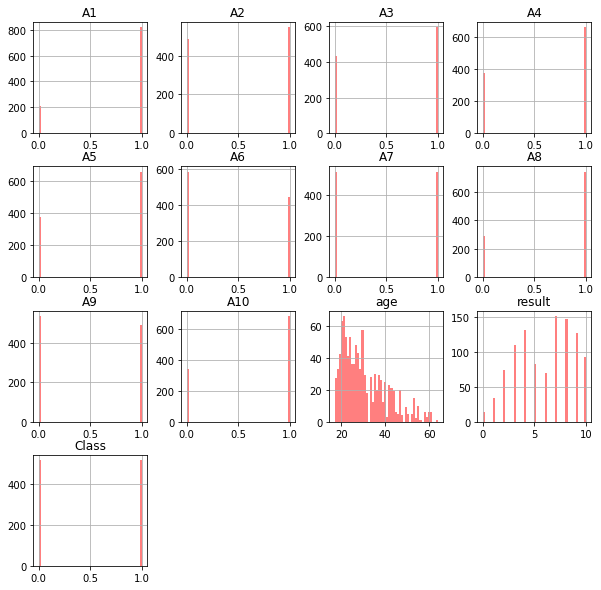

In [27]:
plt.figure()

#Affichage de la distribution pour chaque colonne du dataset avant la transformation avec des plots bars
autism_DF_balanced.hist(color="r", alpha=0.5, bins=50, figsize=(10,10))
plt.title("Distribution des données de chaque colonne avant transformation")

In [28]:
#Transformation de l'age en utilisant du LOG
autism_DF_balanced["age"] = autism_DF_balanced["age"].map(lambda x: log(x))

#Affichage de Skeweness pour chaque colonne du dataset apres la transformation
print("Le Skew de chaque colonne apres la transformation:")
autism_DF_balanced.skew()

Le Skew de chaque colonne apres la transformation:


A1       -1.450004
A2       -0.116873
A3       -0.310924
A4       -0.570157
A5       -0.570157
A6        0.270794
A7       -0.003889
A8       -0.972816
A9        0.085640
A10      -0.705047
age       0.376563
result   -0.235129
Class     0.000000
dtype: float64

Text(0.5, 1.0, 'Distribution des données de chaque colonne apres transformation')

<Figure size 432x288 with 0 Axes>

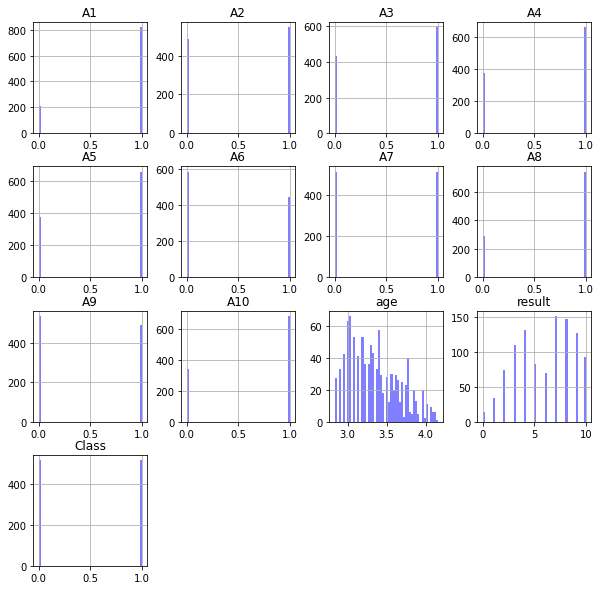

In [29]:
plt.figure()

#Affichage de la distribution pour chaque colonne du dataset apres la transformation avec des plots bars
autism_DF_balanced.hist(color="b", alpha=0.5, bins=50, figsize=(10,10))
plt.title("Distribution des données de chaque colonne apres transformation")


La seule colonne qu'on avait pu touché était celle de l'age, et les autres la plupart des temps étaient des colonnes à des valeurs de 0 et 1 aucune transformation(Expononentiel, Carré ....etc) marche dessus, et puis on a la derniere colonne result qui est bien distribué en lois gaussienne.

## 4-4 Data Reduction
Le but de cette partie est de réduire le nombre de colonnes et tuples qui peuvent avoir un effet négatif ou celles qui n'apporte rien sur le model du classification.

### Suppression de quelques colonnes 
A partir de l'étude éffectue en dessous, on voit qu'il y'a quelques colonnes si on les supprime çà va pas influencer sur le model de prédiction.<br>
Parmi ces colonnes:<br>
<b>country:</b> Lors des tests initiaux des modèles de classification, cette variable n'a pas montré d'importance significative pour l'exactitude des prédictions. En tant que facteur avec plus de 60 niveaux, il est trop grand pour être traité par certaines fonctions de classification. Donc, pour assurer la compatibilité, elle sera supprimé.
<br>
<b>used_app_before:</b> Cette variable indique si un individu a utilisé ou non l'application de dépistage. Ce n'est pas un indicateur significatif de notre variable cible, donc cela sera également supprimé.
<br>
<b>age_desc:</b> Cette variable classe la tranche d'âge d'un individu. Toute personne âgée de plus de 17 ans est considérée comme un adulte. Comme toutes nos observations concernent des adultes de 17 ans et plus, ce facteur n'a qu'un seul niveau et ne peut donc offrir aucun avantage significatif à l'analyse.
<br>
<b>result:</b> On remarque qu'une valeur de résultat de 7 ou plus sera toujours classée comme Class = YES. Par conséquent, l'inclusion de cette variable signifierait que les algorithmes d'apprentissage automatique auraient déjà essentiellement le résultat de la variable cible. Aux fins de cette analyse, il sera également supprimé.(On peu le voir sur la matrice de corrélation avec une corrélation de 0.87 avec le label class)

C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


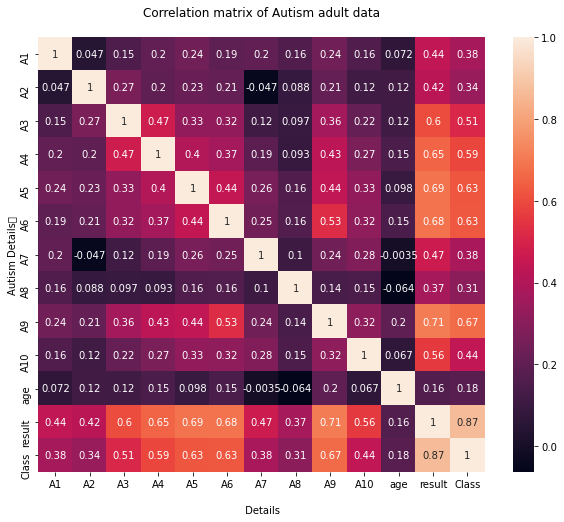

In [30]:
#Affichage de la matrice de corrélation
a4_dims = (10, 8)
fig, ax = plt.subplots(figsize=a4_dims)

hm = sns.heatmap(ax=ax,data=autism_DF_balanced.corr(), annot = True)
hm.set(xlabel='\n Details', ylabel='Autism Details\t', title = "Correlation matrix of Autism adult data\n")

plt.show()

In [31]:
#Suppression des colonnes qu'on a pas besoin
autism_DF = autism_DF_balanced.drop(columns=['country','used_app_before','age_desc','result'])
autism_DF

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,age,gender,ethnicity,jundice,autism,relation,Class
431,1,1,1,1,1,1,1,1,1,1,4.110874,m,White-European,yes,yes,Self,1
687,1,1,1,0,1,1,1,1,1,1,3.332205,m,White-European,no,no,Self,1
322,1,1,1,0,1,1,1,1,0,1,3.091042,m,'Middle Eastern ',no,no,Self,1
54,1,1,1,1,1,1,1,1,1,1,3.850148,m,White-European,no,no,Self,1
446,1,0,0,1,1,0,1,1,1,1,2.995732,f,White-European,no,no,Self,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,1,0,0,1,0,0,0,1,0,1,3.433987,f,White-European,no,no,Self,0
695,1,0,1,1,0,0,1,1,0,0,3.332205,m,Latino,no,no,Parent,0
697,1,1,1,1,1,0,0,0,0,1,3.828641,f,Asian,no,no,Self,0
700,1,0,0,0,0,0,0,1,0,1,3.526361,m,Hispanic,no,no,Parent,0


# 5- Analyse des données
<br><b>Remarque:</b>
Cette analyse de données se porte sur le dataset apres avoir fait de data cleaning sur ce dernier( no outliers, no missing data and no redundance)


<h6>Frequence d'etre malade et non malade par rapport à l'age </h6>

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(92.625, 0.5, 'Frequence')

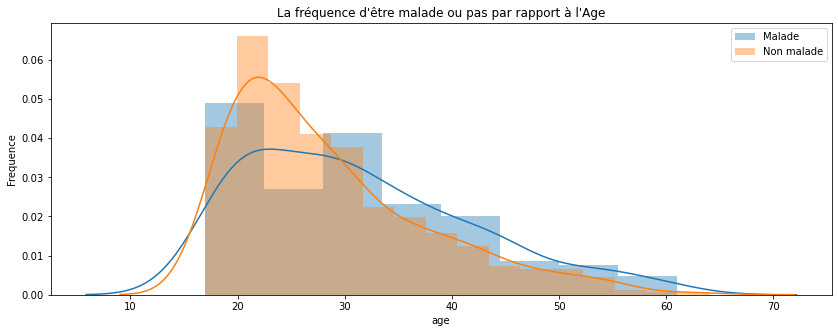

In [32]:
plt.figure(figsize=(14, 5))
sns.distplot(vis_data[vis_data['Class'] == 1]['age'], label= "Malade")
sns.distplot(vis_data[vis_data['Class'] == 0]['age'], label= "Non malade")
plt.legend()
plt.title("La fréquence d'être malade ou pas par rapport à l'Age")
plt.savefig("FrequencegeneralAge.png") 
plt.ylabel('Frequence')


La figure desssus représente des courbes qui décrivent la fréquence d’être malade ou pas en fonction de l’âge de la maladie d'Autisme. On constate sur la courbe bleue que la plupart des personnes malades appartiennent à la tranche d’âge entre 18 ans et 38 ans.

<h6>Frequence d'etre malade et non malade par rapport à l'ethnicity </h6>

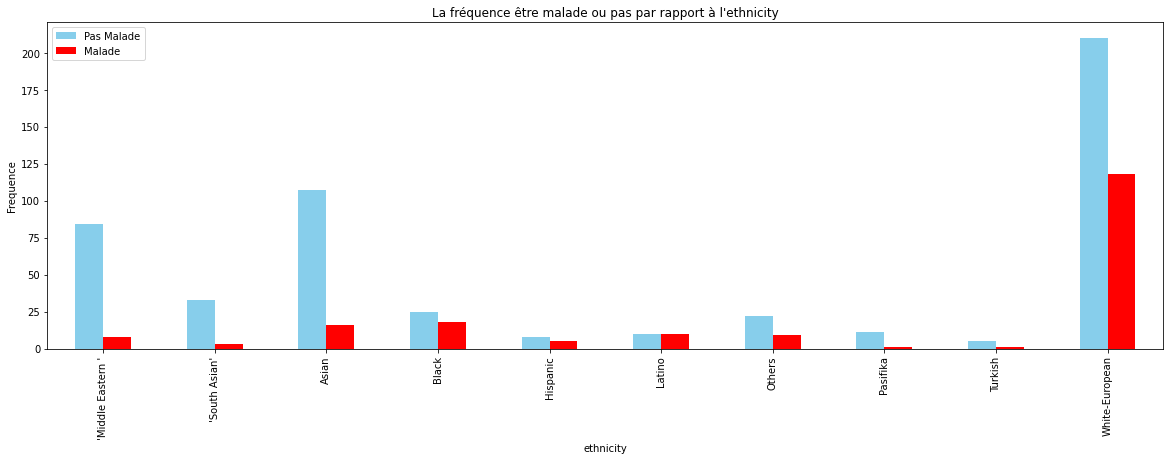

In [33]:
pd.crosstab(vis_data['ethnicity'],vis_data['Class']).plot(kind="bar",figsize=(20,6),color=['skyblue','red'])
plt.title("La fréquence être malade ou pas par rapport à l'ethnicity")
plt.xlabel('ethnicity')
plt.legend(["Pas Malade", "Malade"])
plt.ylabel('Frequence')
plt.show()

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


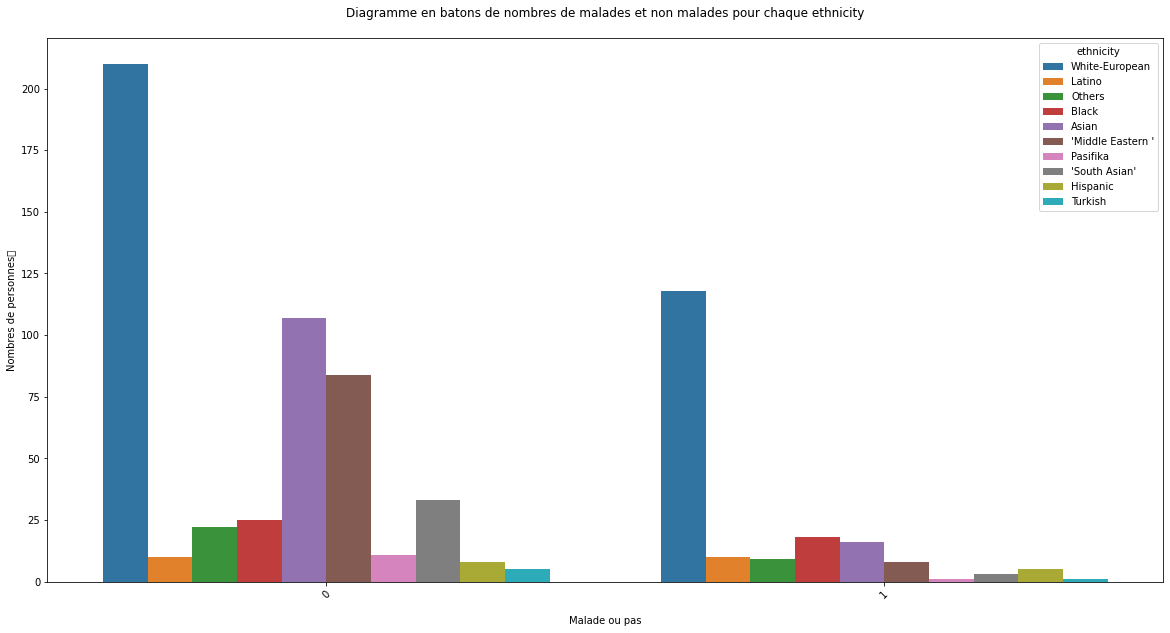

In [34]:
plt.figure(figsize = (20,10))
ax = sns.countplot(x="Class",hue="ethnicity",data=vis_data)
ax.set(xlabel='\nMalade ou pas', ylabel='Nombres de personnes\t', title = "Diagramme en batons de nombres de malades et non malades pour chaque ethnicity\n")
plt.setp(ax.artists,alpha=.5,linewidth=2,edgecolor="w")
plt.xticks(rotation=45)

Les deux figure dessus représente des digrammes en bâtons qui décrit la fréquence d’être malade ou pas en fonction de l'ethenicity. On constate sur cette figure que la plupart des malades sont d'ethnicity "Blancs Europeens", on peut aussi dire que les "Blancs Europeens" sont les plus susceptibles de développer des maladies d'autismes contrairement aux autres Ethnicity.

<h6>Frequence de malade ou pas par rapport au sex</h6>

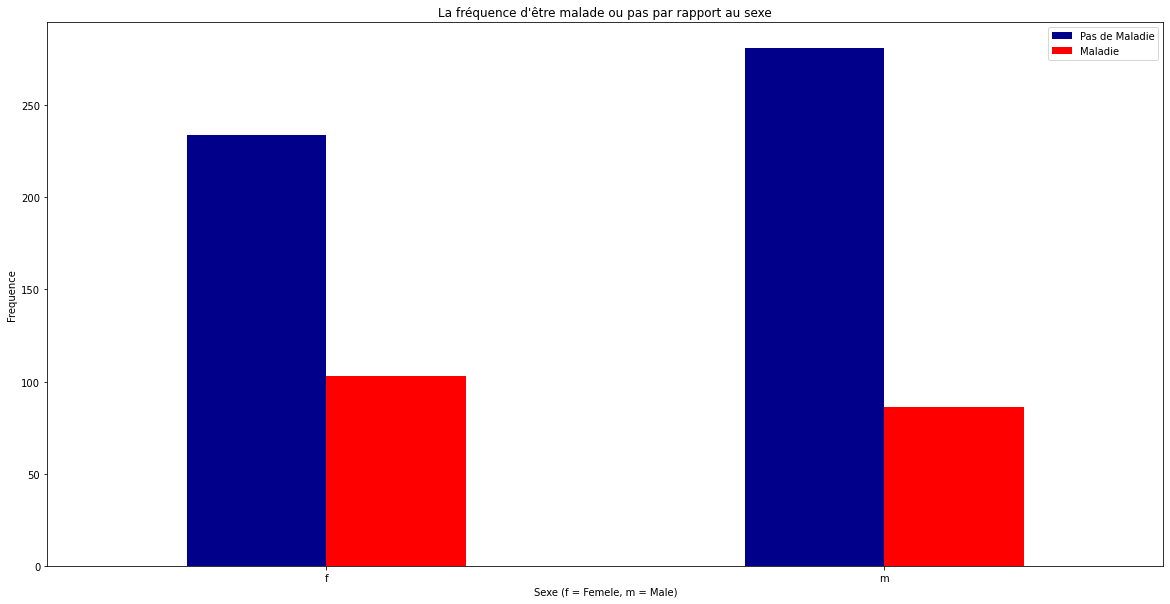

In [35]:
pd.crosstab(vis_data['gender'],vis_data['Class']).plot(kind="bar",figsize=(20,10),color=['darkblue','red' ])
plt.title("La fréquence d'être malade ou pas par rapport au sexe")
plt.xlabel('Sexe (f = Femele, m = Male)')
plt.xticks(rotation=0)
plt.legend(["Pas de Maladie", "Maladie"])
plt.ylabel('Frequence')
plt.show()

La figure dessus représente un digramme en bâtons qui décrit la fréquence d’être malade ou pas en fonction de sexe. On constate sur cette figure que la plupart des malades sont de sexe féminins, on peut aussi dire que les femelles sont les plus susceptibles de développer des maladies d'autisme contrairement aux males.

<h6>Frequence d'etre malade et non malade dans les pays du monde </h6>

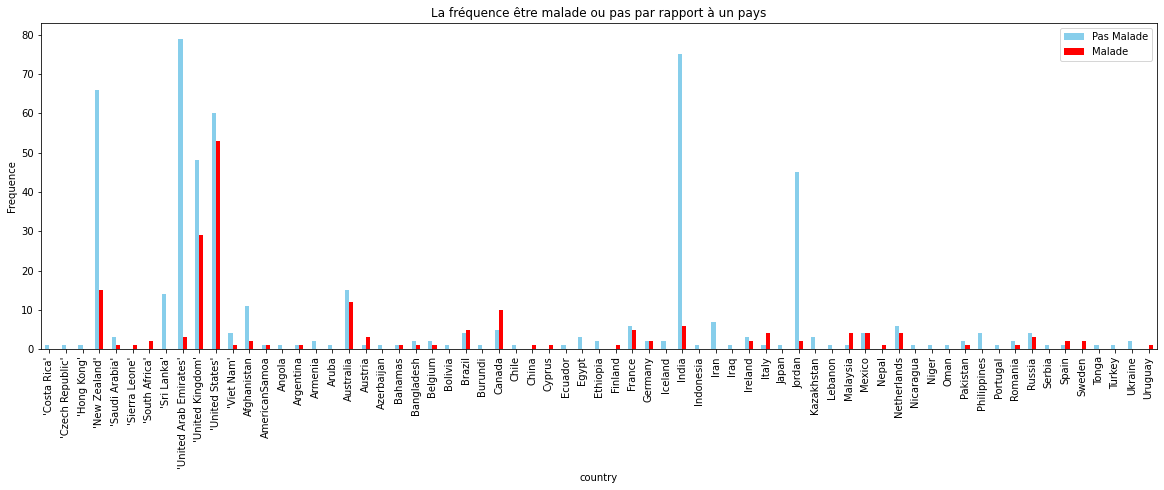

In [36]:
pd.crosstab(vis_data['country'],vis_data['Class']).plot(kind="bar",figsize=(20,6),color=['skyblue','red'])
plt.title("La fréquence être malade ou pas par rapport à un pays")
plt.xlabel('country')
plt.legend(["Pas Malade", "Malade"])
plt.ylabel('Frequence')
plt.show()

La figure dessus représente un digramme en bâtons qui décrit la fréquence d’être malade ou pas en fonction de pays. On constate sur cette figure que la plupart des malades sont des Etats Unis d'Amérique en premier, puis de Royaume Unis et l'australie et Nouvelle Zealande. On peut aussi dire que les pays anglophons ou d'ethnicité Blanc Europeen sont les plus susceptibles de développer des maladies d'autisme contrairement au reste du monde.

# 6-  Typage catégoriques des colonnes non numéric & ONE HOT ENCODING

In [37]:
#Typage des Colonnes non numeric en catégorielles
autism_DF.relation = pd.Categorical(autism_DF["relation"], ordered = False)
autism_DF.gender = pd.Categorical(autism_DF["gender"], ordered = False)
autism_DF.ethnicity = pd.Categorical(autism_DF["ethnicity"], ordered = False)
autism_DF.autism = pd.Categorical(autism_DF["autism"], ordered = False)
autism_DF.jundice = pd.Categorical(autism_DF["jundice"], ordered = False)

autism_DF.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,age,gender,ethnicity,jundice,autism,relation,Class
431,1,1,1,1,1,1,1,1,1,1,4.110874,m,White-European,yes,yes,Self,1
687,1,1,1,0,1,1,1,1,1,1,3.332205,m,White-European,no,no,Self,1
322,1,1,1,0,1,1,1,1,0,1,3.091042,m,'Middle Eastern ',no,no,Self,1
54,1,1,1,1,1,1,1,1,1,1,3.850148,m,White-European,no,no,Self,1
446,1,0,0,1,1,0,1,1,1,1,2.995732,f,White-European,no,no,Self,1


In [38]:
#Création des dummies pour les colonnes catégorielles et puis suppression des colonnes supplimentaires
_Dummies = pd.get_dummies(autism_DF[["gender","ethnicity","jundice","autism","relation"]])
del _Dummies["gender_f"]
del _Dummies["jundice_no"]
del _Dummies["autism_no"]

_Dummies.head()

,gender_m,ethnicity_'Middle Eastern ',ethnicity_'South Asian',ethnicity_Asian,ethnicity_Black,ethnicity_Hispanic,ethnicity_Latino,ethnicity_Others,ethnicity_Pasifika,ethnicity_Turkish,ethnicity_White-European,jundice_yes,autism_yes,relation_'Health care professional',relation_Others,relation_Parent,relation_Relative,relation_Self
431,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1
687,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
322,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
54,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
446,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [39]:
#Regroupage des colonnes Numeric quantifiables ensemble
_Quantifiers = autism_DF[["A1", "A2", "A3", "A4", "A5", "A6", "A7","A8","A9","A10","age"]]
_Quantifiers.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,age
431,1,1,1,1,1,1,1,1,1,1,4.110874
687,1,1,1,0,1,1,1,1,1,1,3.332205
322,1,1,1,0,1,1,1,1,0,1,3.091042
54,1,1,1,1,1,1,1,1,1,1,3.850148
446,1,0,0,1,1,0,1,1,1,1,2.995732


In [40]:
#Creation des Features(concaténation des quantifiers et des dummmies) et de Labels
X = pd.DataFrame(data=pd.concat([_Quantifiers, _Dummies], axis = 1))
Y = autism_DF["Class"]

X.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,ethnicity_Pasifika,ethnicity_Turkish,ethnicity_White-European,jundice_yes,autism_yes,relation_'Health care professional',relation_Others,relation_Parent,relation_Relative,relation_Self
431,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,0,0,0,0,1
687,1,1,1,0,1,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,1
322,1,1,1,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
54,1,1,1,1,1,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,1
446,1,0,0,1,1,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,1


# 7- Création de l'ensemble de training et de l'ensemble de test

In [41]:
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)


#  8-  Deux algorithmes de classification
Apres avoir préparer les données dans la partie de preprocessing de données, on va maintenant implimenté deux algorithms de classification pour faire de forecasting
## 8-1 Decision Tree


In [42]:
from sklearn.tree import DecisionTreeClassifier

# Metrics : Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report

#Instanciation de model Decision Tree
dti = DecisionTreeClassifier()

#Entrainement de Modele de classification
dti.fit(X_train, Y_train)

#Prediction du modele
pred = dti.predict(X_test).astype(int)
print("La précision de modele Decision Tree Classifier est: ",accuracy_score(Y_test, pred))

La précision de modele Decision Tree Classifier est:  0.941747572815534


tn : 92  fp : 11  fn:  1  tp : 102
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       103
           1       0.90      0.99      0.94       103

    accuracy                           0.94       206
   macro avg       0.95      0.94      0.94       206
weighted avg       0.95      0.94      0.94       206

Confusion matrix
[[ 92  11]
 [  1 102]]


<AxesSubplot:>

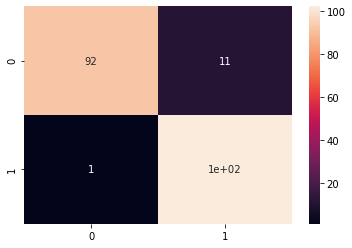

In [43]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp=confusion_matrix(Y_test,pred).ravel()

print ("tn :" ,tn," fp :",fp," fn: ",fn," tp :",tp)

# print classification report
print(classification_report(Y_test, pred))

#Affichage de la matrice de confusion
cf_matrix = confusion_matrix(Y_test,pred)
print("Confusion matrix")
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)


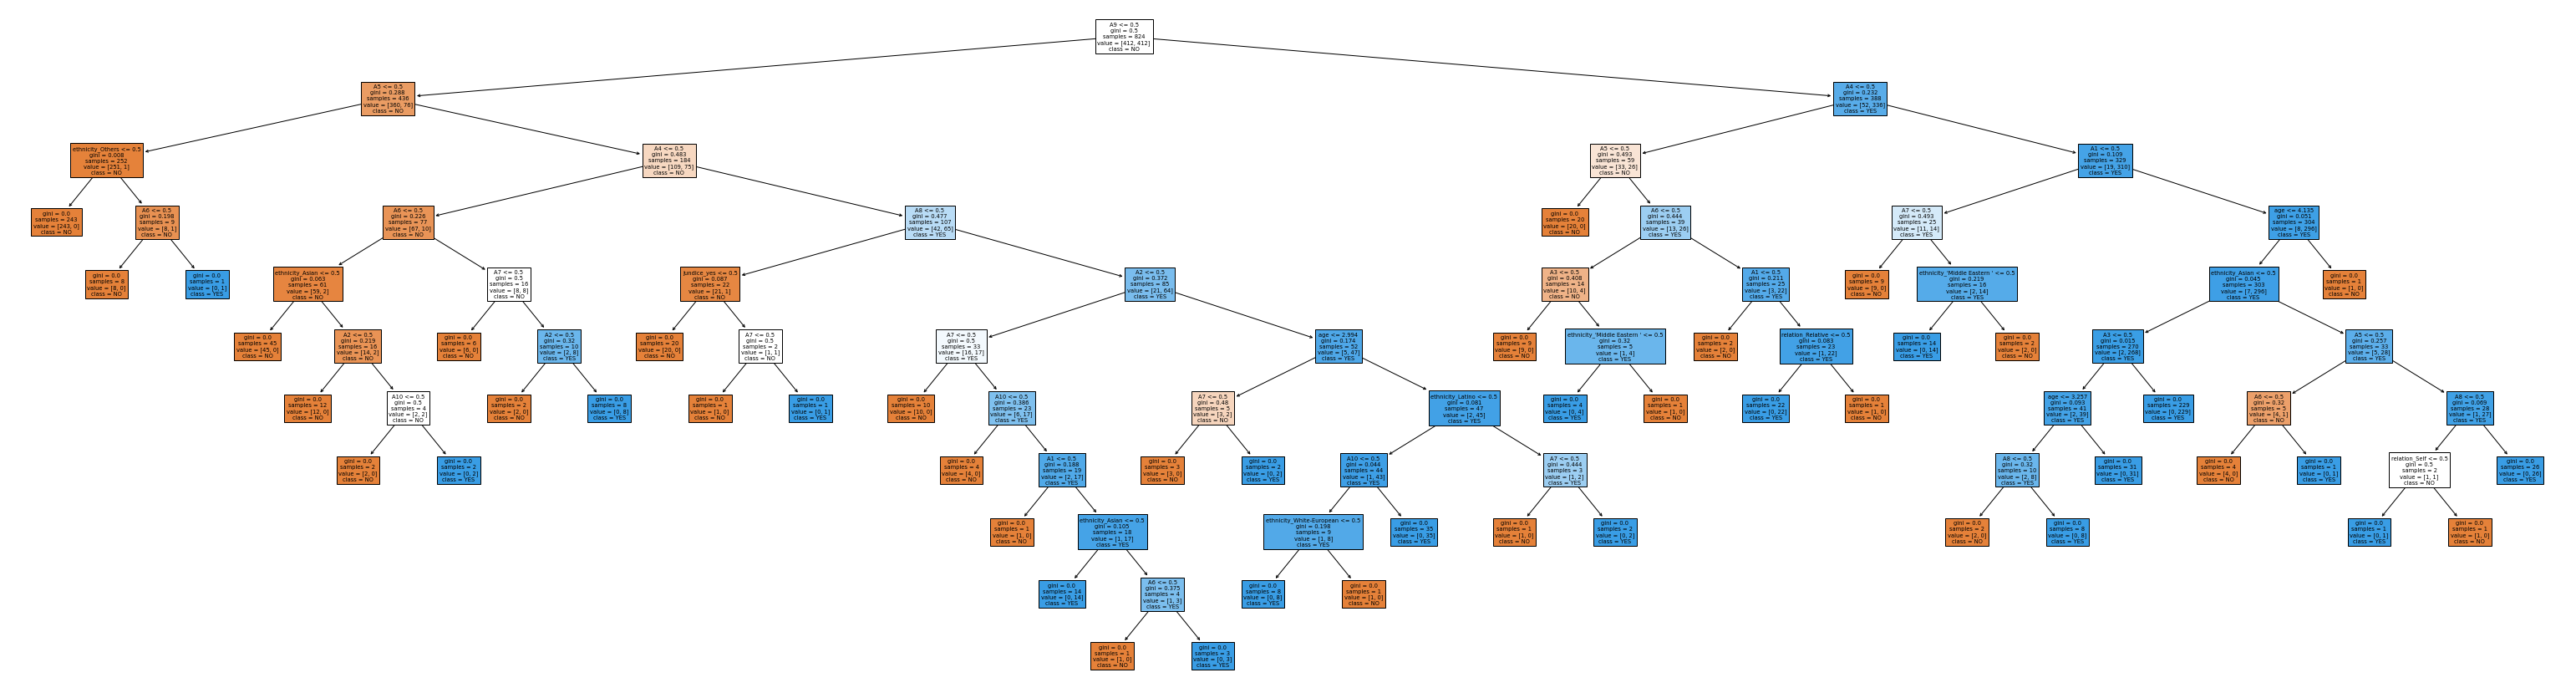

In [44]:
from sklearn import tree

#Affichage de l'arbre de decision 
fig = plt.figure(figsize=(55,15))
_ = tree.plot_tree(dti, 
                   feature_names=X.columns,  
                   class_names=['NO','YES'],
                   filled=True)

In [45]:
#Affichage des regles de decision Tree qu'on a
n_nodes = dti.tree_.node_count
children_left = dti.tree_.children_left
children_right = dti.tree_.children_right
feature = dti.tree_.feature
threshold = dti.tree_.threshold

def find_path(node_numb, path, x):
        path.append(node_numb)
        if node_numb == x:
            return True
        left = False
        right = False
        if (children_left[node_numb] !=-1):
            left = find_path(children_left[node_numb], path, x)
        if (children_right[node_numb] !=-1):
            right = find_path(children_right[node_numb], path, x)
        if left or right :
            return True
        path.remove(node_numb)
        return False


def get_rule(path, column_names):
    mask = ''
    for index, node in enumerate(path):
        #We check if we are not in the leaf
        if index!=len(path)-1:
            # Do we go under or over the threshold ?
            if (children_left[node] == path[index+1]):
                mask += "(df['{}']<= {}) \t ".format(column_names[feature[node]], threshold[node])
            else:
                mask += "(df['{}']> {}) \t ".format(column_names[feature[node]], threshold[node])
    # We insert the & at the right places
    mask = mask.replace("\t", "&", mask.count("\t") - 1)
    mask = mask.replace("\t", "")
    return mask

# Leaves
leave_id = dti.apply(X_test)

paths ={}
for leaf in np.unique(leave_id):
    path_leaf = []
    find_path(0, path_leaf, leaf)
    paths[leaf] = np.unique(np.sort(path_leaf))

rules = {}
for key in paths:
    rules[key] = get_rule(paths[key], X.columns)
    
print("Les lois de cette arbre sont: ")
rules

Les lois de cette arbre sont: 


{3: "(df['A9']<= 0.5) & (df['A5']<= 0.5) & (df['ethnicity_Others']<= 0.5)  ",
 5: "(df['A9']<= 0.5) & (df['A5']<= 0.5) & (df['ethnicity_Others']> 0.5) & (df['A6']<= 0.5)  ",
 10: "(df['A9']<= 0.5) & (df['A5']> 0.5) & (df['A4']<= 0.5) & (df['A6']<= 0.5) & (df['ethnicity_Asian']<= 0.5)  ",
 12: "(df['A9']<= 0.5) & (df['A5']> 0.5) & (df['A4']<= 0.5) & (df['A6']<= 0.5) & (df['ethnicity_Asian']> 0.5) & (df['A2']<= 0.5)  ",
 14: "(df['A9']<= 0.5) & (df['A5']> 0.5) & (df['A4']<= 0.5) & (df['A6']<= 0.5) & (df['ethnicity_Asian']> 0.5) & (df['A2']> 0.5) & (df['A10']<= 0.5)  ",
 17: "(df['A9']<= 0.5) & (df['A5']> 0.5) & (df['A4']<= 0.5) & (df['A6']> 0.5) & (df['A7']<= 0.5)  ",
 19: "(df['A9']<= 0.5) & (df['A5']> 0.5) & (df['A4']<= 0.5) & (df['A6']> 0.5) & (df['A7']> 0.5) & (df['A2']<= 0.5)  ",
 20: "(df['A9']<= 0.5) & (df['A5']> 0.5) & (df['A4']<= 0.5) & (df['A6']> 0.5) & (df['A7']> 0.5) & (df['A2']> 0.5)  ",
 23: "(df['A9']<= 0.5) & (df['A5']> 0.5) & (df['A4']> 0.5) & (df['A8']<= 0.5) & (df['jun

## 8-2 Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier 

#Initiation de Random Forest Classifier
rf = RandomForestClassifier()

#Entrainement du model sur les données
rf.fit(X_train, Y_train)

#prediction du modele sur les données
pred = rf.predict(X_test).astype(int)
print("La précision de modele Random Forest est: ",accuracy_score(Y_test, pred))

La précision de modele Random Forest est:  0.9660194174757282


tn : 97  fp : 6  fn:  1  tp : 102
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       103
           1       0.94      0.99      0.97       103

    accuracy                           0.97       206
   macro avg       0.97      0.97      0.97       206
weighted avg       0.97      0.97      0.97       206

Confusion matrix
[[ 97   6]
 [  1 102]]


<AxesSubplot:>

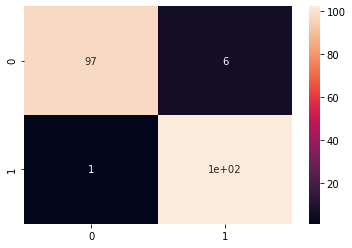

In [47]:
tn, fp, fn, tp=confusion_matrix(Y_test,pred).ravel()

print ("tn :" ,tn," fp :",fp," fn: ",fn," tp :",tp)

# print classification report
print(classification_report(Y_test, pred))

cf_matrix = confusion_matrix(Y_test,pred)
print("Confusion matrix")
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)

# 9- Decision Tree VS Random Forest
On va comparer  dans cette section la qualité des deux algorithms en utilisant les differentes metrics.

Decision Tree: 0.941747572815534
Decision Tree:               precision    recall  f1-score   support

           0       0.99      0.89      0.94       103
           1       0.90      0.99      0.94       103

    accuracy                           0.94       206
   macro avg       0.95      0.94      0.94       206
weighted avg       0.95      0.94      0.94       206


Random Forest: 0.9660194174757282
Random Forest:               precision    recall  f1-score   support

           0       0.99      0.94      0.97       103
           1       0.94      0.99      0.97       103

    accuracy                           0.97       206
   macro avg       0.97      0.97      0.97       206
weighted avg       0.97      0.97      0.97       206




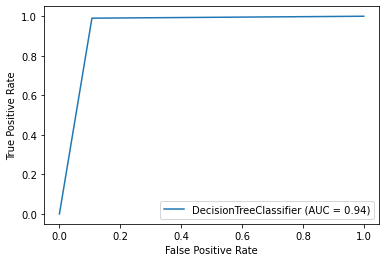

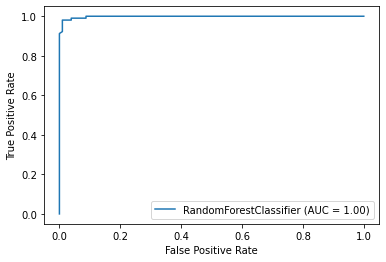

In [48]:
from sklearn import metrics
models = []

models.append(('Decision Tree:', DecisionTreeClassifier()))
models.append(('Random Forest:', RandomForestClassifier()))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

for name, model in models:
    model.fit(X_train, Y_train)
    pred = model.predict(X_test).astype(int)
    print(name, accuracy_score(Y_test, pred))
    print(name,classification_report(Y_test, pred))
    print()
    metrics.plot_roc_curve(model, X_test, Y_test) 
    

plt.show()

A partir des résultats obtenus, on peu conclure que le meilleur model pour cette éxperience sur le Autsim adult disease Dataset est Random Forest Classifier. Ou on  peu voir, il a legerement le dessus sur Decision Tree sur toutes les mésures de qualité vu et éffectué sur ces deux modeles.<br>
Celà conclut, qu'il est de preference il faut prendre Random Forest que Decision Tree, car il donne des meilleures résultats que çà soit avec les labels initiaux de dataset ou sans, il est toujours devant plus précis que l'autre algorithme de classification. 

Text(0.5, 0.98, 'ROC curve comparison')

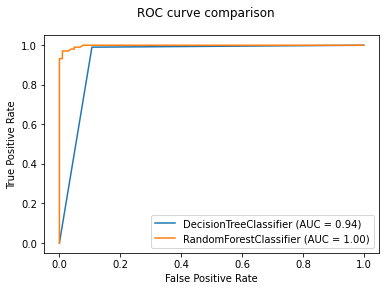

In [49]:
#Comparaison entre les deux Modeles avec les courbes de ROC
dti_disp = metrics.plot_roc_curve(dti, X_test, Y_test)
rfc_disp = metrics.plot_roc_curve(rf, X_test, Y_test, ax=dti_disp.ax_)
rfc_disp.figure_.suptitle("ROC curve comparison")


# Bonus
On va faire comparer les deux algorithmes pris au depart avec d'autres algorithmes de classification.

In [50]:
#Comparaison entre plusieurs algorithmes pour voir le meilleur d'entre eux.
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression

# Metrics : Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report

models = []
models.append(('Logistic Regression:', LogisticRegression()))
models.append(('Decision Tree      :', DecisionTreeClassifier()))
models.append(('Naive Bayes        :', GaussianNB()))
models.append(('SVM                :', SVC()))
models.append(('Random Forest      :', RandomForestClassifier()))


for name, model in models:
    model.fit(X_train, Y_train)
    pred = model.predict(X_test).astype(int)
    print(name, accuracy_score(Y_test, pred))

Logistic Regression: 0.970873786407767
Decision Tree      : 0.9466019417475728
Naive Bayes        : 0.9077669902912622
SVM                : 0.9660194174757282
Random Forest      : 0.9514563106796117


D'apres cette derniere experience de Bonus, on peut voir que le mielleur Algorithme éxistant pour la classification de données qu'on a est Logistic Regression avec 0.97 de précision.